<a href="https://colab.research.google.com/github/YunJuyoung1913790/SMU_ITB2022/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*열어분... 저장하실때 표에 한글 깨져있는지 한번씩만 확인해주시고... 저장하시기 전에 런타임->다시시작 및 모두실행 한번씩만 해주시고... 한글 깨져있으면 고쳐주세요 어흐흑*

# 데이터 분석 소개
**데이터 분석 목적**

변수를 활용하여 식당창업의 성패를 예측 A-B:성공(0), D-E:실패(1)


**사용 데이터**

(1) 주데이터

*   서울특별시 행정동/업종별 상권 평가 데이터(2022년 10월)  - 금융데이터거래소

(2) 보조데이터
*   서울시 우리마을가게 상권분석 데이터(상권-추정매출) - 서울특별시
*   서울특별시 행정동 위치 데이터 - 깃허브


**사용 변수**

(1) 주데이터:시군구, 업종중분류, 시장성, 성장성, 계패업안정성, 경쟁도, 유동인구 시장성, 거주인구 시장성

(2) 보조데이터: 

# 1. 데이터 전처리

**엑셀 전처리**

(1) 주데이터
*   불필요한 변수 제거(수집 날짜, 행정동코드, 광역시도명, 행정동, 업종대분류, 업종소분류)
*   요식업 데이터만 추출
*   성공등급 C 제거


(2) 보조데이터
*   불필요한 변수 제거(기준_년_코드, 상권_구분_코드, 상권_코드, 서비스_업종_코드)
*   요식업 데이터만 추출
*   지역구 전처리 -> 강남(0),강동(1),강서(2),강북(3),관악(4),광진(5),구로(6),금천(7),노원(8),동대문(9),도봉(10),동작(11),마포(12),서대문(13),성동(14),성북(15),서초(16),송파(17),영등포(18),용산(19),양천(20),은평(21),종로(22),중구(23),중랑(24)

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 
mpl.rc("font", family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# original_data.csv 데이터 가져오기 (original_data약칭 od사용)
od = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/original_data.csv", encoding='euc-kr')
display(od.head()) 
print(od.info())

# help_data.csv 데이터 가져오기 (help_data약칭 hd사용)
hd = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/help_data.csv", encoding='euc-kr')
display(hd.head()) 
print(hd.info())

구명칭  업종중분류 성공등급   시장성    성장성  개폐업안정성    경쟁도  유동인구시장성  거주인구시장성         위도  \
0   성동구  음식/요리    A  15.0  100.0     0.0  100.0      9.8      9.1  37.554410   
1   강남구   유흥주점    A  13.5  100.0     0.0  100.0      6.5      4.8  37.498095   
2  영등포구   유흥주점    A  35.0   49.0     0.0  100.0     25.6      8.8  37.519740   
3   노원구  음식/요리    A  11.6  100.0     0.0   95.5      3.7      4.2  37.620744   
4   송파구  음식/요리    A  24.4  100.0     0.0   85.0      1.5      2.4  37.505281   

           경도  
0  127.056516  
1  127.027610  
2  126.911265  
3  127.078451  
4  127.118756

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   구명칭      2382 non-null   object 
 1   업종중분류    2382 non-null   object 
 2   성공등급     2382 non-null   object 
 3   시장성      2382 non-null   float64
 4   성장성      2382 non-null   float64
 5   개폐업안정성   2382 non-null   float64
 6   경쟁도      2382 non-null   float64
 7   유동인구시장성  2382 non-null   float64
 8   거주인구시장성  2382 non-null   float64
 9   위도       2382 non-null   float64
 10  경도       2382 non-null   float64
dtypes: float64(8), object(3)
memory usage: 204.8+ KB
None


분기  상권구분  시군구 서비스업종코드    분기당매출금액  분기당매출건수  주중_매출_비율  주말_매출_비율  월요일_매출_비율  \
0   1  골목상권   22   한식음식점   19260034      613        98         2         17   
1   1  골목상권   22   커피-음료    7343161     1321        97         3         21   
2   1  골목상권    9   한식음식점  505751122    14880        71        29         15   
3   1  골목상권    9   중식음식점   24248205      673        57        44         13   
4   1  골목상권    9   분식전문점   44974821     2943        84        16         22   

   화요일_매출_비율  ...  시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  연령대_10_매출_건수  \
0         22  ...                0       153       199             0   
1         22  ...                0       751       388             0   
2         13  ...             1590      9035      5411           167   
3          0  ...              101       291       382            20   
4         14  ...              344      2097       672             0   

   연령대_20_매출_건수  연령대_30_매출_건수  연령대_40_매출_건수  연령대_50_매출_건수  연령대_60_이상_매출_건수  \
0            31           128           112            45               35   
1           141           227           362           200              207   
2          2180          2609          2781          4183             2527   
3           286           164            86            92               25   
4           723           525          1032           343              145   

   점포수  
0    3  
1    6  
2   39  
3    3  
4    9  

[5 rows x 76 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835 entries, 0 to 3834
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   분기               3835 non-null   int64 
 1   상권구분             3835 non-null   object
 2   시군구              3835 non-null   int64 
 3   서비스업종코드          3835 non-null   object
 4   분기당매출금액          3835 non-null   int64 
 5   분기당매출건수          3835 non-null   int64 
 6   주중_매출_비율         3835 non-null   int64 
 7   주말_매출_비율         3835 non-null   int64 
 8   월요일_매출_비율        3835 non-null   int64 
 9   화요일_매출_비율        3835 non-null   int64 
 10  수요일_매출_비율        3835 non-null   int64 
 11  목요일_매출_비율        3835 non-null   int64 
 12  금요일_매출_비율        3835 non-null   int64 
 13  토요일_매출_비율        3835 non-null   int64 
 14  일요일_매출_비율        3835 non-null   int64 
 15  시간대_00~06_매출_비율  3835 non-null   int64 
 16  시간대_06~11_매출_비율  3835 non-null   int64 
 17  시간대_11~14_매출_비율  3835 non-null   

In [ ]:
#원본데이터 전처리
#업종코드 변환: 음식/요리(0), 유흥주점&음료/주류(1)
od.replace('음식/요리', '0', inplace=True)
od.replace('유흥주점', '1', inplace=True)
od.replace('음료/주류', '1', inplace=True)

#성공등급 변환
od = od[~od['성공등급'].str.contains('C')]
#성공등급에서 A-B:성공(0), D-E:실패(1)
od.replace('A', '0', inplace=True)
od.replace('B', '0', inplace=True)
od.replace('D', '1', inplace=True)
od.replace('E', '1', inplace=True)


In [ ]:
#보조데이터 전처리
hd['시군구'].replace('0', '강남', inplace=True)
hd['시군구'].replace('1', '강동', inplace=True)
hd['시군구'].replace('2', '강서', inplace=True)
hd['시군구'].replace('3', '강북', inplace=True)
hd['시군구'].replace('4', '관악', inplace=True)
hd['시군구'].replace('5', '광진', inplace=True)
hd['시군구'].replace('6', '구로', inplace=True)
hd['시군구'].replace('7', '금천', inplace=True)
hd['시군구'].replace('8', '노원', inplace=True)
hd['시군구'].replace('9', '동대문', inplace=True)
hd['시군구'].replace('10', '도봉', inplace=True)
hd['시군구'].replace('11', '동작', inplace=True)
hd.replace('12', '마포', inplace=True)
hd.replace('13', '서대문', inplace=True)
hd.replace('14', '성동', inplace=True)
hd.replace('15', '성북', inplace=True)
hd.replace('16', '서초', inplace=True)
hd.replace('17', '송파', inplace=True)
hd.replace('18', '영등포', inplace=True)
hd.replace('19', '용산', inplace=True)
hd.replace('20', '양천', inplace=True)
hd.replace('21', '은평', inplace=True)
hd.replace('22', '종로', inplace=True)
hd.replace('23', '명동', inplace=True) #23중구 포함
hd.replace('23', '을지', inplace=True) #23중구 포함
hd.replace('24', '중랑', inplace=True)
display(hd.head())

분기  상권구분  시군구 서비스업종코드    분기당매출금액  분기당매출건수  주중_매출_비율  주말_매출_비율  월요일_매출_비율  \
0   1  골목상권   22   한식음식점   19260034      613        98         2         17   
1   1  골목상권   22   커피-음료    7343161     1321        97         3         21   
2   1  골목상권    9   한식음식점  505751122    14880        71        29         15   
3   1  골목상권    9   중식음식점   24248205      673        57        44         13   
4   1  골목상권    9   분식전문점   44974821     2943        84        16         22   

   화요일_매출_비율  ...  시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  연령대_10_매출_건수  \
0         22  ...                0       153       199             0   
1         22  ...                0       751       388             0   
2         13  ...             1590      9035      5411           167   
3          0  ...              101       291       382            20   
4         14  ...              344      2097       672             0   

   연령대_20_매출_건수  연령대_30_매출_건수  연령대_40_매출_건수  연령대_50_매출_건수  연령대_60_이상_매출_건수  \
0            31           128           112            45               35   
1           141           227           362           200              207   
2          2180          2609          2781          4183             2527   
3           286           164            86            92               25   
4           723           525          1032           343              145   

   점포수  
0    3  
1    6  
2   39  
3    3  
4    9  

[5 rows x 76 columns]

In [ ]:
#서비스업종코드 변환: 음식/요리(0), 유흥주점 & 음료/주류(1)
hd.replace('분식전문점', '음식/요리', inplace=True)
hd.replace('치킨전문점', '음식/요리', inplace=True)
hd.replace('양식음식점', '음식/요리', inplace=True)
hd.replace('일식음식점', '음식/요리', inplace=True)
hd.replace('중식음식점', '음식/요리', inplace=True)
hd.replace('한식음식점', '음식/요리', inplace=True)
hd.replace('패스트푸드점', '음식/요리', inplace=True)
hd.replace('커피-음료', '음식/요리', inplace=True)
hd.replace('호프-간이주점', '유흥주점 & 음료/주류', inplace=True)
display(hd.head())

분기  상권구분  시군구 서비스업종코드    분기당매출금액  분기당매출건수  주중_매출_비율  주말_매출_비율  월요일_매출_비율  \
0   1  골목상권   22   음식/요리   19260034      613        98         2         17   
1   1  골목상권   22   음식/요리    7343161     1321        97         3         21   
2   1  골목상권    9   음식/요리  505751122    14880        71        29         15   
3   1  골목상권    9   음식/요리   24248205      673        57        44         13   
4   1  골목상권    9   음식/요리   44974821     2943        84        16         22   

   화요일_매출_비율  ...  시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  연령대_10_매출_건수  \
0         22  ...                0       153       199             0   
1         22  ...                0       751       388             0   
2         13  ...             1590      9035      5411           167   
3          0  ...              101       291       382            20   
4         14  ...              344      2097       672             0   

   연령대_20_매출_건수  연령대_30_매출_건수  연령대_40_매출_건수  연령대_50_매출_건수  연령대_60_이상_매출_건수  \
0            31           128           112            45               35   
1           141           227           362           200              207   
2          2180          2609          2781          4183             2527   
3           286           164            86            92               25   
4           723           525          1032           343              145   

   점포수  
0    3  
1    6  
2   39  
3    3  
4    9  

[5 rows x 76 columns]

# 데이터 시각화

**1. 식당 분포 시각화**

In [ ]:
!pip install folium
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 위도
latitude = 37.562436
# 경도
longitude = 127.001804

In [ ]:
from folium.plugins import MarkerCluster


m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = od[['위도', '경도']]


marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

In [ ]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent) 불러오기
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=12, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(od['위도'], od['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

m

시군구 별로 점포 분포을 살펴본 결과, 주로 강남 지역에 요식업 관련 점포가 밀집되어 있는 것으로 나타났다.

(주황색:100개 이상의 점포를 가진 지역 표시)

**2. 변수별 점포 분포 시각화**

(1) 성공 점포 분포

In [ ]:
#성공 점포 시각화
od_0 = od.loc[od['성공등급'] == '0'].groupby('구명칭')['성공등급'].count()
od_0

구명칭
강남구     44
강동구     32
강북구     26
강서구     34
관악구     38
광진구     33
구로구     30
금천구     22
노원구     27
도봉구     19
동대문구    35
동작구     28
마포구     40
서대문구    25
서초구     36
성동구     41
성북구     24
송파구     50
양천구     39
영등포구    44
용산구     30
은평구     30
종로구     31
중구      39
중랑구     23
Name: 성공등급, dtype: int64

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=od_0,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="test")
m

/usr/local/lib/python3.8/dist-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


진하기가 진할수록 성공한 식당이 많이 밀집되어 있다. 시각화를 통해 송파,강남,마포,동작,성동 등 한강 일대를 중심으로 성공한 식당이 많이 분포하는 것을 확인할 수 있다.

**2. 변수별 점포 분포 시각화**

(2) 실패 점포 분포

In [ ]:
#실패 점포 시각화
od_1 = od.loc[od['성공등급'] == '1'].groupby('구명칭')['성공등급'].count()
od_1

구명칭
강남구      88
강동구      68
강북구      40
강서구      90
관악구      85
광진구      68
구로구      58
금천구      28
노원구      61
도봉구      49
동대문구     48
동작구      53
마포구      68
서대문구     44
서초구      61
성동구      57
성북구      70
송파구     110
양천구      72
영등포구     67
용산구      56
은평구      57
종로구      45
중구       51
중랑구      68
Name: 성공등급, dtype: int64

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=od_1,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="test")
m

진하기가 진할수록 실패한 식당이 많이 밀집되어 있다. 시각화를 통해 송파,강남,관악, 강서 등 주로 강남지역 일대를 중심으로 식당 실패 사례가 두드러지는 것을 확인할 수 있다. 앞선 <성공 식당 분포> 시각화와 관련해 송파와 강남이 성공과 실패 모두 높은 지역이라는 사실은 두 지역 내에 경쟁도가 치열하기 때문이라고 예측해볼 수 있다.

**3. 지역 별 변수평균 시각화**

(1) 시장성이 높은 지역

In [ ]:
od_market = od.groupby('구명칭')['시장성'].mean()
od_market

구명칭
강남구     2.828030
강동구     2.680000
강북구     3.596970
강서구     2.714516
관악구     2.975610
광진구     2.950495
구로구     3.897727
금천구     2.088000
노원구     3.365909
도봉구     3.417647
동대문구    3.549398
동작구     3.040741
마포구     3.733333
서대문구    3.591304
서초구     5.520619
성동구     3.656122
성북구     2.391489
송파구     3.013750
양천구     3.688288
영등포구    3.100000
용산구     3.431395
은평구     3.233333
종로구     2.238158
중구      2.435556
중랑구     3.325275
Name: 시장성, dtype: float64

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=od_market,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="test")
m

시장성 평균을 시각화한 결과, 서초구가 가장 높은 것으로 드러났다.

**3. 지역 별 변수평균 시각화**

(2) 성장성이 높은 지역

In [ ]:
od_grow = od.groupby('구명칭')['성장성'].mean()
od_grow

구명칭
강남구     29.762121
강동구     30.512000
강북구     28.624242
강서구     25.662097
관악구     25.633333
광진구     27.684158
구로구     24.257955
금천구     30.054000
노원구     29.575000
도봉구     29.839706
동대문구    29.589157
동작구     28.718519
마포구     22.430556
서대문구    29.636232
서초구     31.580412
성동구     28.056122
성북구     27.085106
송파구     27.379375
양천구     27.588288
영등포구    25.342342
용산구     30.320930
은평구     31.597701
종로구     34.148684
중구      31.826667
중랑구     24.179121
Name: 성장성, dtype: float64

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=od_grow,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="test")
m

성장성은 오히려 종로구 일대를 포함한 강북 지역 일대에서 높게 나타났다.

**3. 지역 별 변수평균 시각화**

(3) 경쟁성이 높은 지역

In [ ]:
od_compe = od.groupby('구명칭')['경쟁도'].mean()
od_compe

구명칭
강남구     15.016667
강동구     12.465000
강북구     15.153030
강서구     15.540323
관악구     15.548780
광진구     12.462376
구로구     17.157955
금천구      9.318000
노원구     12.567045
도봉구      8.158824
동대문구    15.527711
동작구     15.216049
마포구     21.929630
서대문구    13.788406
서초구     15.192784
성동구     17.800000
성북구     10.118085
송파구     16.398125
양천구     16.690991
영등포구    17.614414
용산구     15.674419
은평구     11.996552
종로구     15.814474
중구      19.472222
중랑구     11.832967
Name: 경쟁도, dtype: float64

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=od_compe,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="test")
m

앞서 <성공/실패 점포 시각화>에서 송파구와 강남구가 경쟁이 치열할 것이라는 예상과는 달리, 마포와 영등포, 중구와 성동구에서 점포 간 경쟁이 심한 것으로 드러났다.

**4. 상관관계 시각화**

변수 간 상관관계를 분석해본다.

In [ ]:
import numpy as np 

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#위도,경도 변수 제외한 od_corr2 데이터프레임 생성
od_corr=od.drop('위도', axis =1)
od_corr2=od_corr.drop('경도', axis =1)
display(od_corr2.head())

구명칭 업종중분류 성공등급   시장성    성장성  개폐업안정성    경쟁도  유동인구시장성  거주인구시장성
0   성동구     0    0  15.0  100.0     0.0  100.0      9.8      9.1
1   강남구     1    0  13.5  100.0     0.0  100.0      6.5      4.8
2  영등포구     1    0  35.0   49.0     0.0  100.0     25.6      8.8
3   노원구     0    0  11.6  100.0     0.0   95.5      3.7      4.2
4   송파구     0    0  24.4  100.0     0.0   85.0      1.5      2.4

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


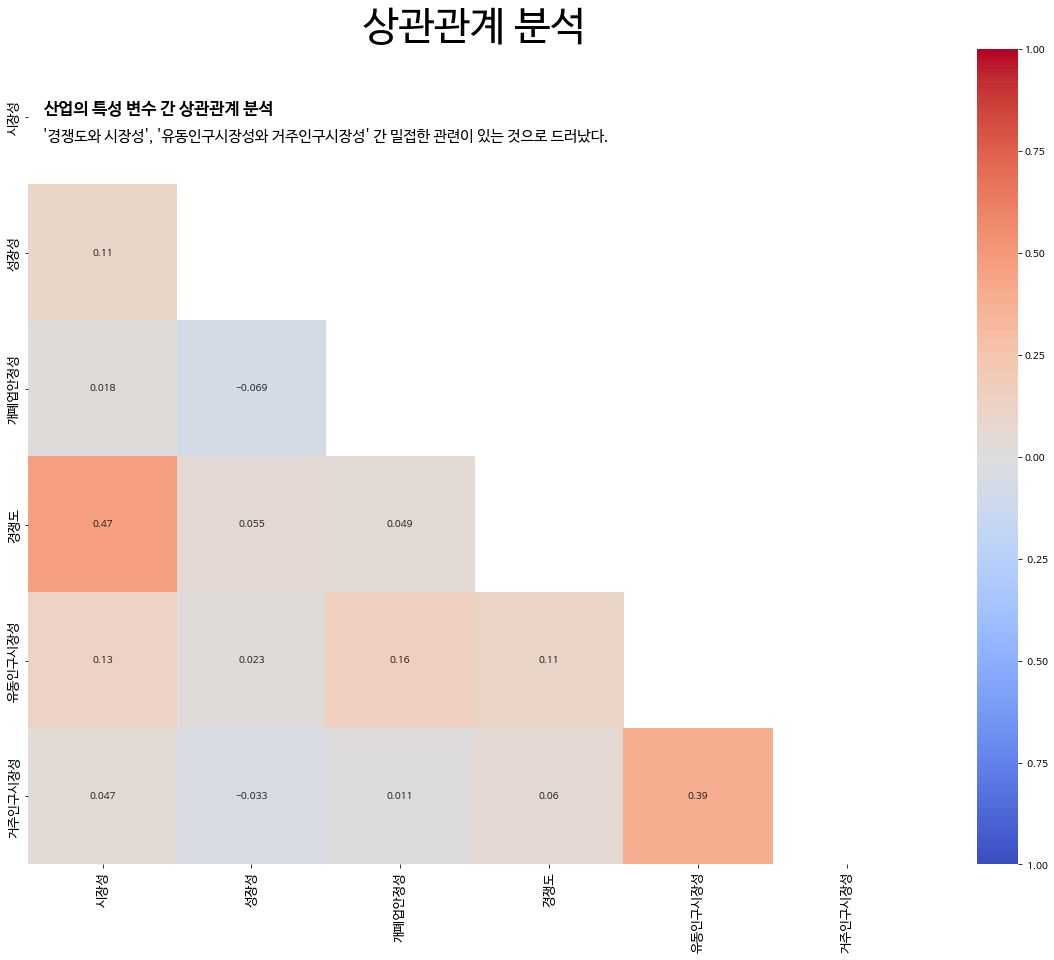

In [ ]:
#상관관계 분석도
plt.figure(figsize=(20,15))

heat_table = od_corr2.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm', vmin=-1, vmax=1)
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=13, rotation=90)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=13)
plt.title('상관관계 분석', fontsize=40)
plt.text(0.1, 0.47, '산업의 특성 변수 간 상관관계 분석', fontweight='bold', fontfamily='NanumBarunGothic', fontsize=17)
plt.text(0.1, 0.67, 
"'경쟁도와 시장성', '유동인구시장성와 거주인구시장성' 간 밀접한 관련이 있는 것으로 드러났다."
, fontsize=15, fontweight='light', fontfamily='NanumBarunGothic')
plt.show()

# 예측 모델-전처리

In [ ]:
#구명칭 변환
od.replace('강남구', '0', inplace=True)
od.replace('강동구', '1', inplace=True)
od.replace('강서구', '2', inplace=True)
od.replace('강북구', '3', inplace=True)
od.replace('관악구', '4', inplace=True)
od.replace('광진구', '5', inplace=True)
od.replace('구로구', '6', inplace=True)
od.replace('금천구', '7', inplace=True)
od.replace('노원구', '8', inplace=True)
od.replace('동대문구', '9', inplace=True)
od.replace('도봉구', '10', inplace=True)
od.replace('동작구', '11', inplace=True)
od.replace('마포구', '12', inplace=True)
od.replace('서대문구', '13', inplace=True)
od.replace('성동구', '14', inplace=True)
od.replace('성북구', '15', inplace=True)
od.replace('서초구', '16', inplace=True)
od.replace('송파구', '17', inplace=True)
od.replace('영등포구', '18', inplace=True)
od.replace('용산구', '19', inplace=True)
od.replace('양천구', '20', inplace=True)
od.replace('은평구', '21', inplace=True)
od.replace('종로구', '22', inplace=True)
od.replace('중구', '23', inplace=True)
od.replace('중랑구', '24', inplace=True)

display(od.head())

구명칭 업종중분류 성공등급   시장성    성장성  개폐업안정성    경쟁도  유동인구시장성  거주인구시장성         위도  \
0  14     0    0  15.0  100.0     0.0  100.0      9.8      9.1  37.554410   
1   0     1    0  13.5  100.0     0.0  100.0      6.5      4.8  37.498095   
2  18     1    0  35.0   49.0     0.0  100.0     25.6      8.8  37.519740   
3   8     0    0  11.6  100.0     0.0   95.5      3.7      4.2  37.620744   
4  17     0    0  24.4  100.0     0.0   85.0      1.5      2.4  37.505281   

           경도  
0  127.056516  
1  127.027610  
2  126.911265  
3  127.078451  
4  127.118756

In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mglearn

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

1    1562
0     820
Name: 성공등급, dtype: int64


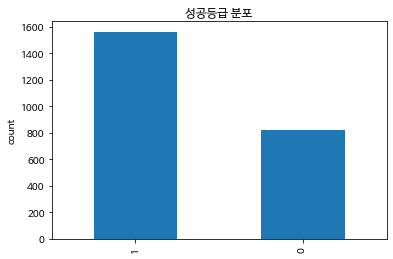

In [ ]:
#추후논의
print(od['성공등급'].value_counts())
od['성공등급'].value_counts().plot.bar()

plt.ylabel('count')
plt.title('성공등급 분포')
plt.show()

# 예측모델

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#보류
X = od.drop(['성공등급'], axis = 1)
y = od['성공등급']

In [ ]:
#성공등급 열 위치 조정
od = od[['성공등급', '구명칭','업종중분류','시장성','성장성','개폐업안정성','경쟁도','유동인구시장성','거주인구시장성','위도','경도']]
display(od.head(10))

성공등급 구명칭 업종중분류   시장성    성장성  개폐업안정성    경쟁도  유동인구시장성  거주인구시장성         위도  \
0    0  14     0  15.0  100.0     0.0  100.0      9.8      9.1  37.554410   
1    0   0     1  13.5  100.0     0.0  100.0      6.5      4.8  37.498095   
2    0  18     1  35.0   49.0     0.0  100.0     25.6      8.8  37.519740   
3    0   8     0  11.6  100.0     0.0   95.5      3.7      4.2  37.620744   
4    0  17     0  24.4  100.0     0.0   85.0      1.5      2.4  37.505281   
5    0  10     0  38.3   57.4     0.0   90.3      9.3      8.5  37.652540   
6    0  17     0  32.9   57.0     0.0  100.0      8.5      4.4  37.505281   
7    0  16     1  65.8   18.5     0.0  100.0      6.7      6.4  37.477368   
8    0  20     1   6.1  100.0     0.0   82.2      3.4      4.6  37.519803   
9    0  23     0   0.0   74.6     0.0  100.0     16.3      2.4  37.562436   

           경도  
0  127.056516  
1  127.027610  
2  126.911265  
3  127.078451  
4  127.118756  
5  127.044262  
6  127.118756  
7  127.033079  
8  126.853474  
9  127.001804

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = od
X = od.iloc[:, 1:]  # 30개 변수 
y = od.iloc[:, 0]   # target 변수 성공등급

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=27)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.988


**의사결정나무**

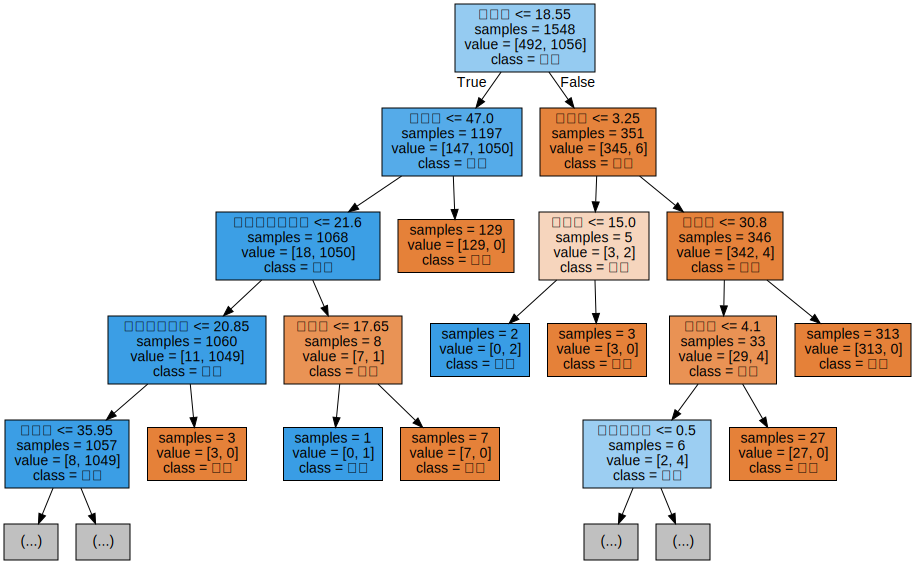

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "성공", "실패"],
                feature_names=od.columns[1:], impurity=False, filled=True, max_depth=4)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

**의사결정나무 변수 중요도 파악**

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.00357539 0.00397265 0.01532944 0.33884715 0.0100803  0.60247243
 0.02108787 0.00463476 0.         0.        ]


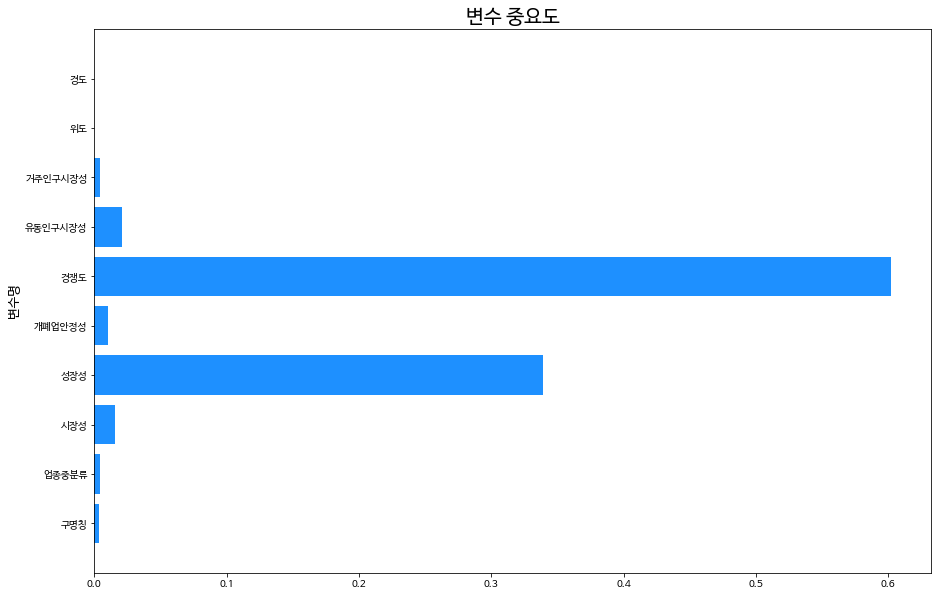

In [ ]:
import numpy as np

def plot_feature_importances_od(model):
    plt.rcParams["figure.figsize"] = (15,10)
    n_features = len(od.columns[1:])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center', color = 'dodgerblue') 
    plt.yticks(np.arange(n_features), od.columns[1:]) 
    plt.ylabel("변수명", fontsize = 13)
    plt.title("변수 중요도", fontsize = 20)
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_od(tree)

In [ ]:
res = pd.DataFrame(result)
res["name"] = od.columns[1:]
display(res.info())

display(res.sort_values(by='name'))  #이름 순으로 정렬

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
 1   name    10 non-null     object 
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


None

0     name
4  0.010080   개폐업안정성
7  0.004635  거주인구시장성
9  0.000000       경도
5  0.602472      경쟁도
0  0.003575      구명칭
3  0.338847      성장성
2  0.015329      시장성
1  0.003973    업종중분류
8  0.000000       위도
6  0.021088  유동인구시장성

**랜덤 포레스트**

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


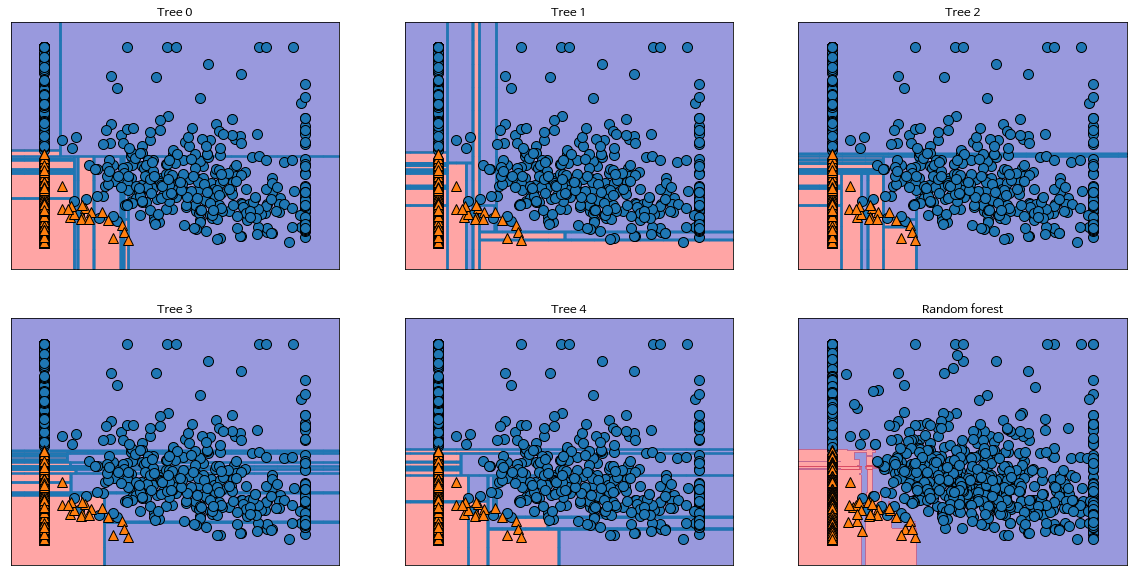

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# '경쟁도','성장성' 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train[['경쟁도','성장성']], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train[['경쟁도','성장성']].values, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train[['경쟁도','성장성']].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X['경쟁도'], X['성장성'], y)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.996


In [ ]:
od.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2382 entries, 0 to 2381
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   성공등급     2382 non-null   object 
 1   구명칭      2382 non-null   object 
 2   업종중분류    2382 non-null   object 
 3   시장성      2382 non-null   float64
 4   성장성      2382 non-null   float64
 5   개폐업안정성   2382 non-null   float64
 6   경쟁도      2382 non-null   float64
 7   유동인구시장성  2382 non-null   float64
 8   거주인구시장성  2382 non-null   float64
 9   위도       2382 non-null   float64
 10  경도       2382 non-null   float64
dtypes: float64(8), object(3)
memory usage: 223.3+ KB


In [ ]:
#맥북 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

**랜덤 포레스트 변수 중요도 파악**

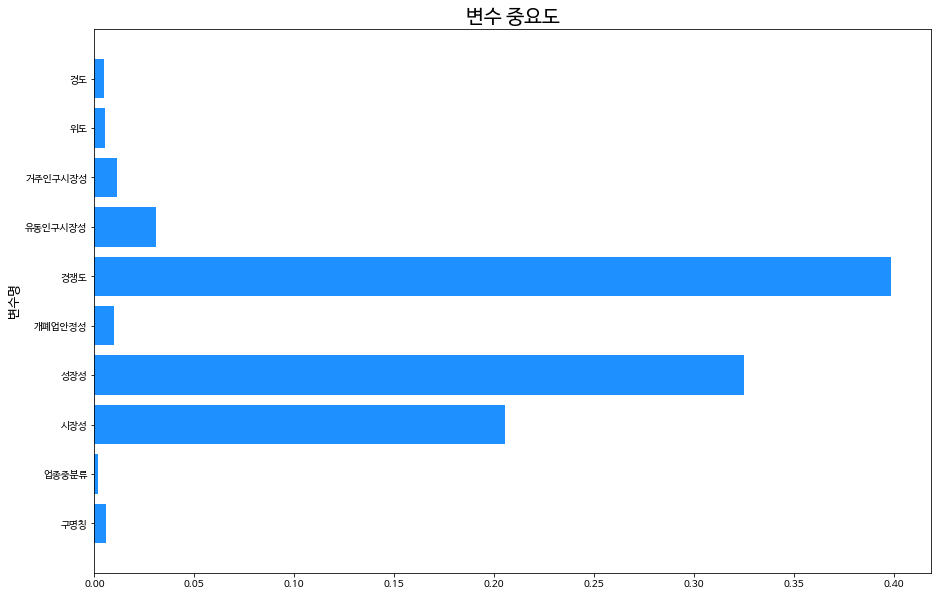

In [ ]:
plot_feature_importances_od(forest)

**그래디언트 부스팅**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.994


**그래디언트 부스팅 변수 중요도 파악**

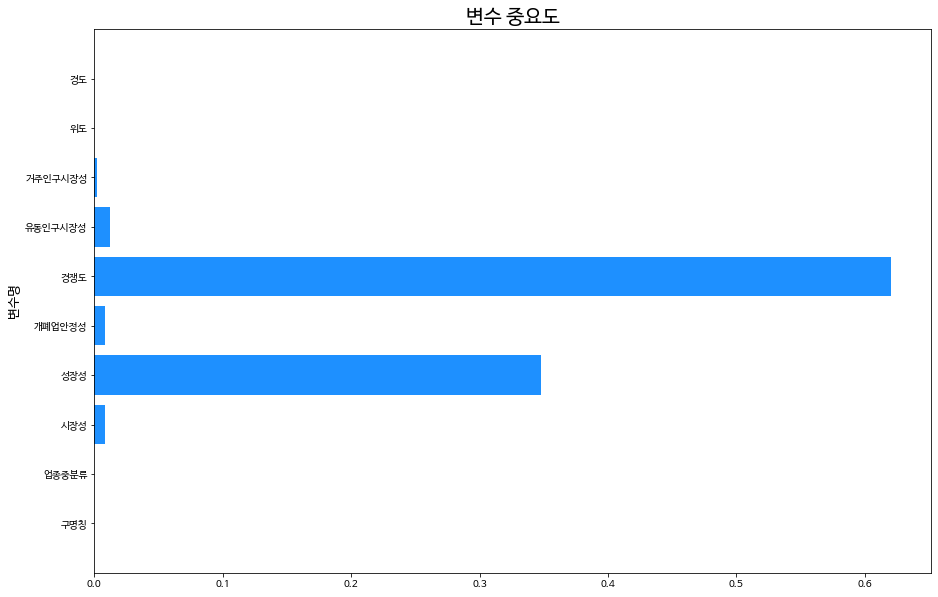

In [ ]:
plot_feature_importances_od(gbrt)

# 분류 모델 평가

**교차검증**

In [ ]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy mean
Decision tree :0.969
Random forest :0.992
Gradient boosting :0.992


**그리드 서치**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters1 = {'max_depth':[4, 5]}
parameters2 = {'max_depth':[4, 5], 'n_estimators':[80, 90, 100]}
parameters3 = {'max_depth':[4, 5], 'learning_rate':[0.1,0.08]}

In [ ]:
grid_tree = GridSearchCV(tree, param_grid=parameters1, cv=5, refit=True)
grid_tree.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_tree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_tree.best_score_))

grid_forest = GridSearchCV(forest, param_grid=parameters2, cv=5, refit=True)
grid_forest.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_forest.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_forest.best_score_))

grid_gbrt = GridSearchCV(gbrt, param_grid=parameters3, cv=5, refit=True)
grid_gbrt.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 5}
GridSearchCV 최고 정확도: 0.9315
GridSearchCV 최적 파라미터: {'max_depth': 5, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.9903
GridSearchCV 최적 파라미터: {'learning_rate': 0.08, 'max_depth': 4}
GridSearchCV 최고 정확도: 0.9916


In [ ]:
print("tree: 시험용 데이터 세트 정확도: {:.3f}".format(grid_tree.score(X_test, y_test)))
print("forest: 시험용 데이터 세트 정확도: {:.3f}".format(grid_forest.score(X_test, y_test)))
print("gbrt: 시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

tree: 시험용 데이터 세트 정확도: 0.964
forest: 시험용 데이터 세트 정확도: 0.993
gbrt: 시험용 데이터 세트 정확도: 0.996


그래디언트 부스팅 모델이 최적의 모델인 것으로 판명.

**정오 분류표**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

dt_pred = grid_tree.predict(X_test)
forest_pred= grid_forest.predict(X_test)
gbrt_pred = grid_gbrt.predict(X_test)

print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, forest_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

Decision tree 시험용 데이터 세트 정확도:0.964
[[300  28]
 [  2 504]]
Random forest 시험용 데이터 세트 정확도:0.993
[[300  28]
 [  2 504]]
Gradient boosting 시험용 데이터 세트 정확도:0.996
[[325   3]
 [  0 506]]


In [ ]:
print("Decision tree")
print('정밀도:{:.3f}'.format(precision_score (y_test, dt_pred, average='binary', pos_label="1")))
print('재현율:{:.3f}'.format(recall_score(y_test, dt_pred, average='binary', pos_label="1")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, dt_pred, average='binary', pos_label="1")))

print("Random forest")
print('정밀도:{:.3f}'.format(precision_score (y_test, forest_pred, average='binary', pos_label="1")))
print('재현율:{:.3f}'.format(recall_score(y_test, forest_pred, average='binary', pos_label="1")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, forest_pred, average='binary', pos_label="1")))

print("Gradienc boosting")
print('정밀도:{:.3f}'.format(precision_score (y_test, gbrt_pred, average='binary', pos_label="1")))
print('재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary', pos_label="1")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, gbrt_pred, average='binary', pos_label="1")))


Decision tree
정밀도:0.947
재현율:0.996
f1-measure:0.971
Random forest
정밀도:0.992
재현율:0.996
f1-measure:0.994
Gradienc boosting
정밀도:0.994
재현율:1.000
f1-measure:0.997


그래디언트 부스팅 모델이 최적인 것으로 판명.

**ROC 곡선과 AUC**

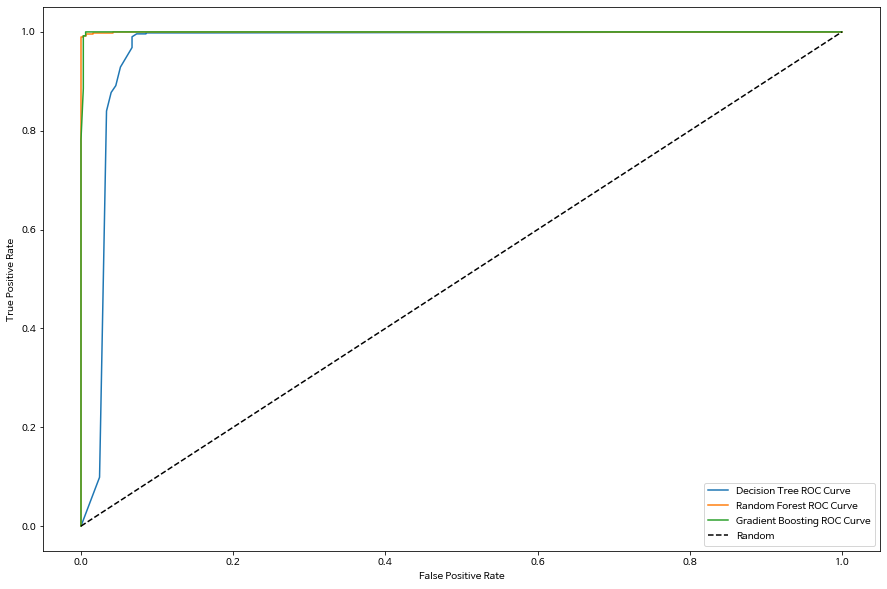

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, grid_tree.predict_proba(X_test)[:, 1], pos_label="1")
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, grid_forest.predict_proba(X_test)[:, 1], pos_label="1")
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, grid_gbrt.predict_proba(X_test)[:, 1], pos_label="1")

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [ ]:
auc_dt = roc_auc_score(y_test, grid_tree.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, grid_forest.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, 1])
print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt))

Decision Tree의 AUC: 0.968
Random Forest의 AUC: 1.000
Gradient Boosting의 AUC: 0.999


랜덤 포레스트 모델이 최적인 것으로 판명.

**종합적인 평가 결과, 그래디언트 부스팅 모델이 가장 적합한 것으로 판명되었다.**

## 추가 시각화

초반 시군구 칼럼명 변경이 안되어 숫자로 표기됨/ 변경되도록 위 오류 수정하면 좋을 것 같아요

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False

import plotly.express as px
import cufflinks as cf
import json
cf.go_offline(connected=True)

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

- 서울시 지역구 요일별 매출액 추이

상위 5개 지역만 추출해서 변환

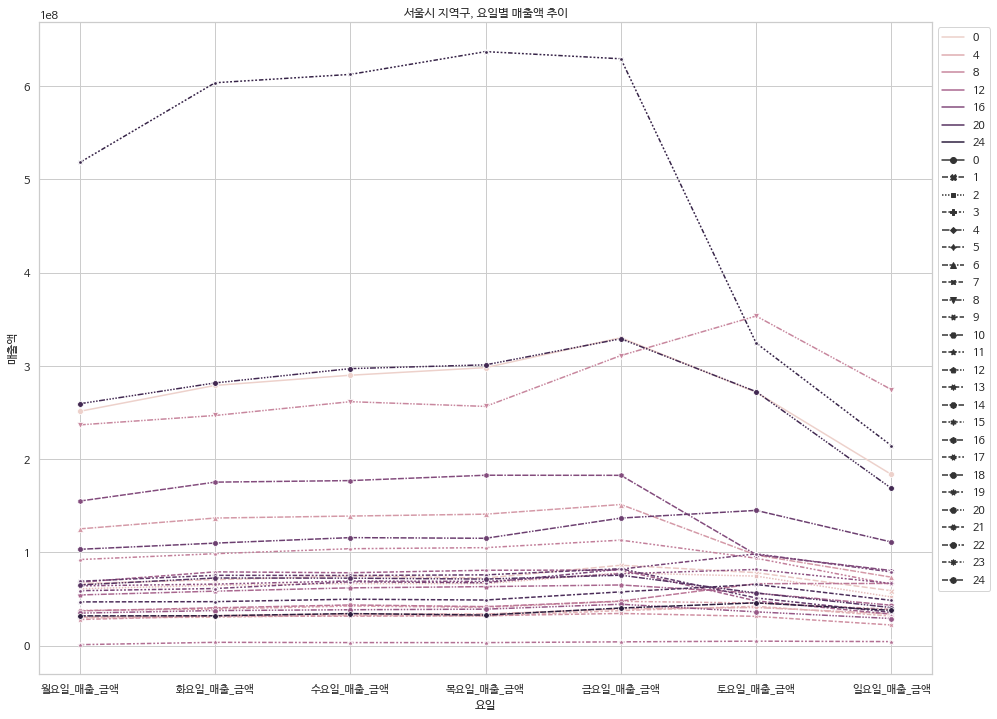

In [ ]:
hd_gu_day = hd[["시군구","월요일_매출_금액","화요일_매출_금액","수요일_매출_금액","목요일_매출_금액","금요일_매출_금액","토요일_매출_금액","일요일_매출_금액"]]
hd_gu = hd_gu_day.melt(id_vars ="시군구", var_name="요일", value_name="매출액")
hd_gu

plt.figure(figsize=(16, 12))
sns.lineplot(data=hd_gu, x="요일", y="매출액", hue='시군구', markers=True, ci=None, style="시군구")
plt.title('서울시 지역구, 요일별 매출액 추이')
plt.legend(bbox_to_anchor=(1,1))

- 서울시 지역구 요일별 매출비율 추이

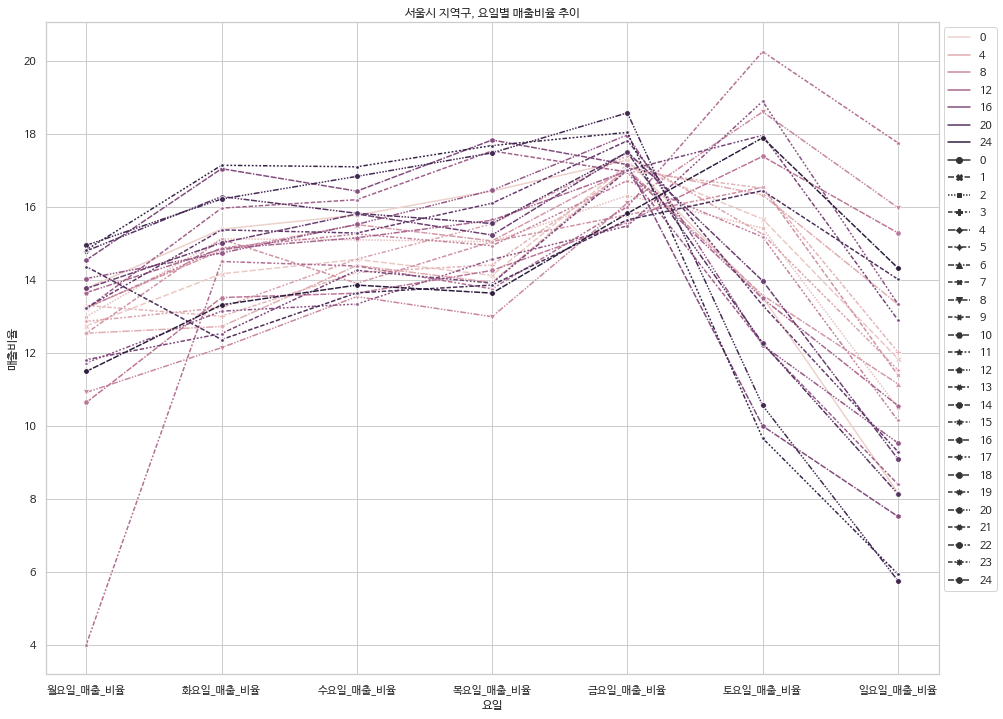

In [ ]:
hd_gu_ratio = hd[["시군구","월요일_매출_비율","화요일_매출_비율","수요일_매출_비율","목요일_매출_비율","금요일_매출_비율","토요일_매출_비율","일요일_매출_비율"]]
hd_gu_ratio = hd_gu_ratio.melt(id_vars ="시군구", var_name="요일", value_name="매출비율")
hd_gu_ratio

plt.figure(figsize=(16, 12))
sns.lineplot(data=hd_gu_ratio, x="요일", y="매출비율", hue='시군구', markers=True, ci=None, style="시군구")
plt.title('서울시 지역구, 요일별 매출비율 추이')
plt.legend(bbox_to_anchor=(1,1))

- 서울시 지역구 요일별 매출건수 추이

상위5개 추출

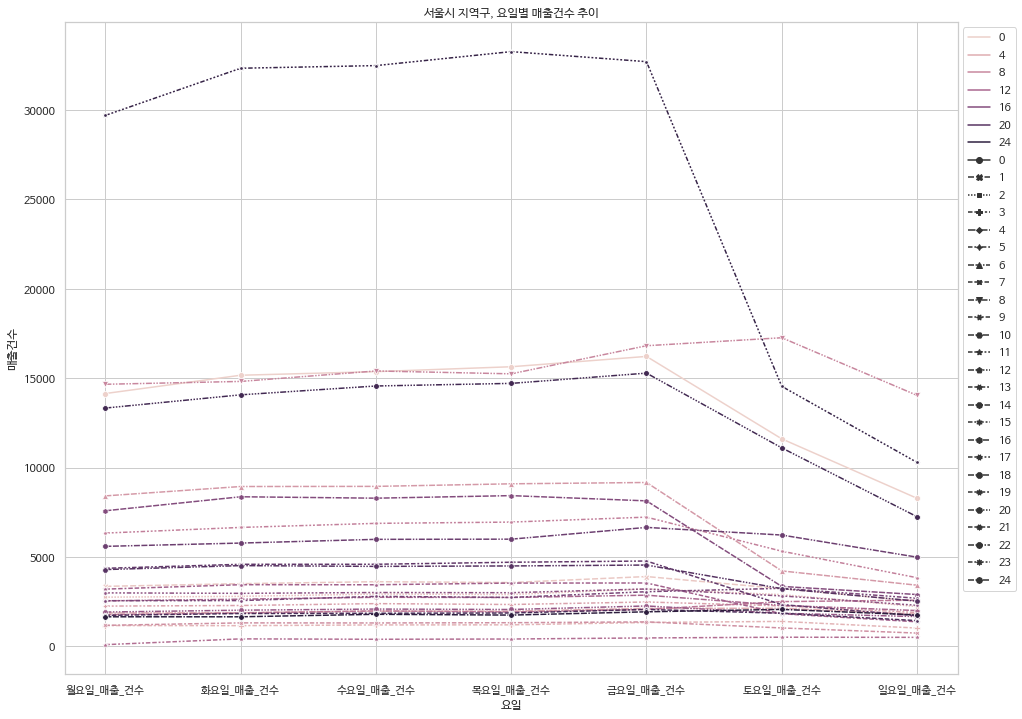

In [ ]:
#지역, 요일별 매출 건수 추이
hd_gu_count = hd[["시군구","월요일_매출_건수","화요일_매출_건수","수요일_매출_건수","목요일_매출_건수","금요일_매출_건수","토요일_매출_건수","일요일_매출_건수"]]
hd_gu_count = hd_gu_count.melt(id_vars ="시군구", var_name="요일", value_name="매출건수")
hd_gu_count

plt.figure(figsize=(16, 12))
sns.lineplot(data=hd_gu_count, x="요일", y="매출건수", hue='시군구', markers=True, ci=None, style="시군구")
plt.title('서울시 지역구, 요일별 매출건수 추이')
plt.legend(bbox_to_anchor=(1,1))

- 요일별, 지역별 매출건수 히트맵

Text(0.5, 1.0, '요일별, 지역별 매출건수 히트맵')

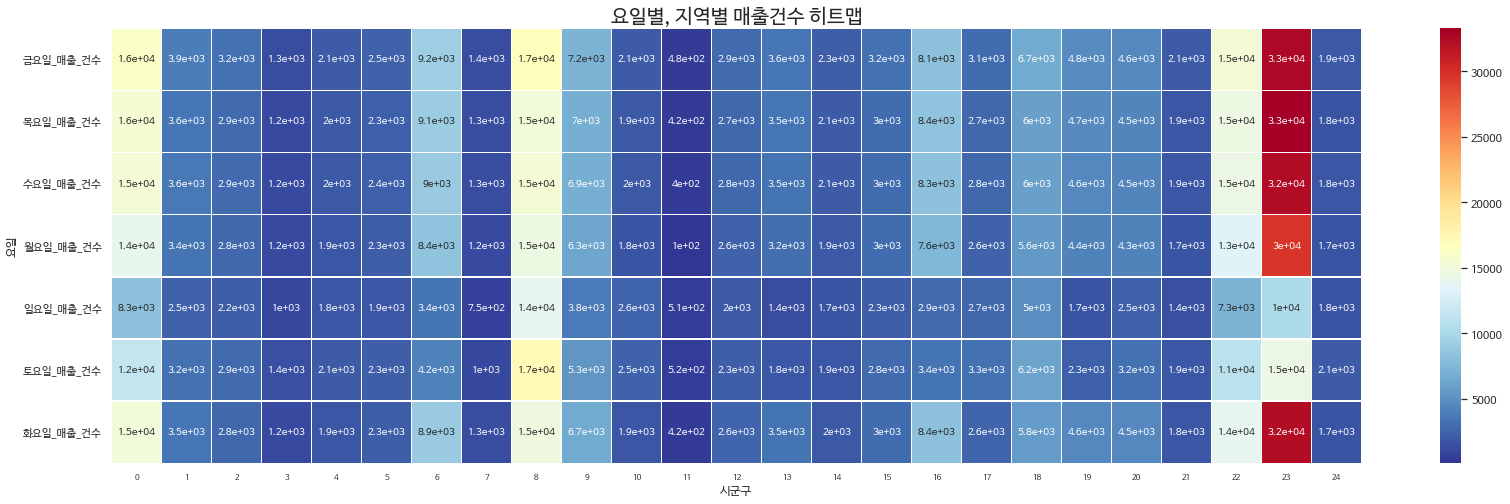

In [ ]:
m = pd.pivot_table(hd_gu_count, index = "요일", columns="시군구", values = "매출건수").round()
plt.figure(figsize=(28,8))
sns.heatmap(m, linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔

            annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            # 소수점 포맷팅 형태
)
plt.xticks(fontsize=8,rotation= 0) 
plt.title('요일별, 지역별 매출건수 히트맵', fontsize=20)

- 전체 구에 대한 요일, 시간, 연령대 매출

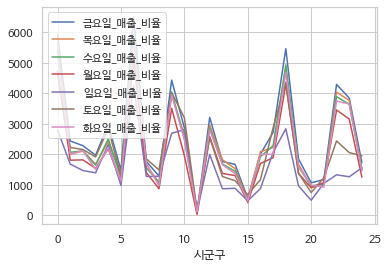

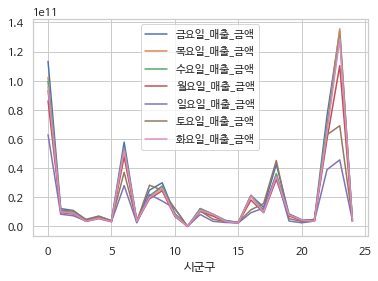

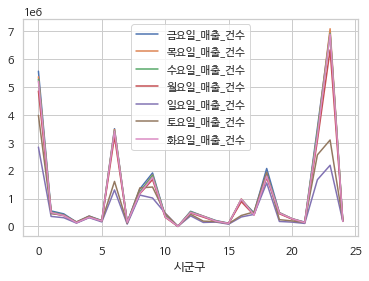

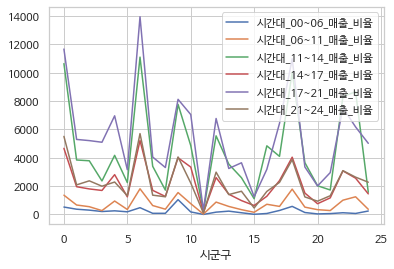

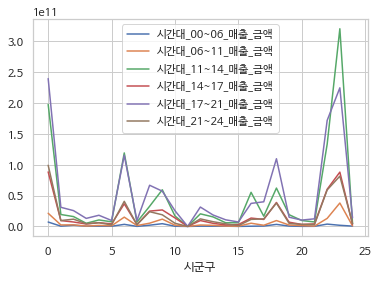

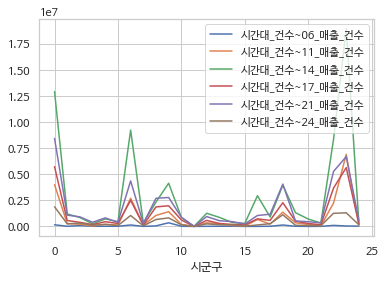

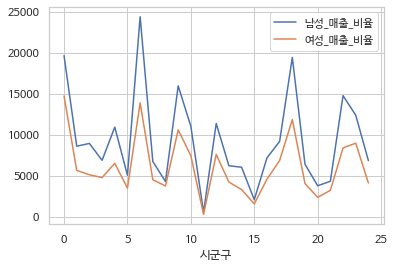

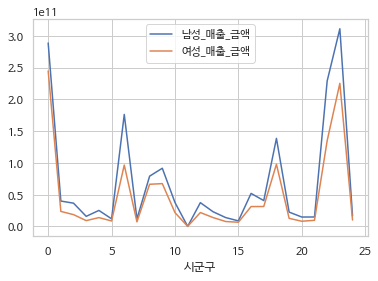

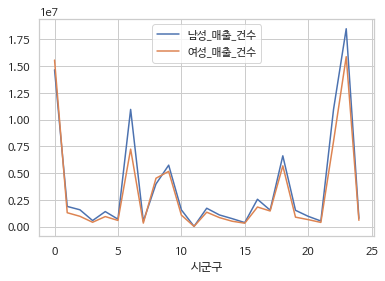

In [ ]:
week_ratio = hd[["시군구","월요일_매출_비율", "화요일_매출_비율"  , "수요일_매출_비율", "목요일_매출_비율", "금요일_매출_비율","토요일_매출_비율" ,"일요일_매출_비율"]]
a = pd.pivot_table(data=week_ratio,index="시군구", aggfunc=np.sum)
a.plot()

week_sale=hd[["시군구","월요일_매출_금액","화요일_매출_금액","수요일_매출_금액","목요일_매출_금액","금요일_매출_금액","토요일_매출_금액","일요일_매출_금액"]]
e = pd.pivot_table(data=week_sale, index="시군구", aggfunc=np.sum)
e.plot()

week_sale_count = hd[["시군구",'월요일_매출_건수','화요일_매출_건수','수요일_매출_건수','목요일_매출_건수','금요일_매출_건수','토요일_매출_건수','일요일_매출_건수']]
i = pd.pivot_table(data=week_sale_count, index="시군구", aggfunc=np.sum)
i.plot()

time_ratio = hd[["시군구","시간대_00~06_매출_비율","시간대_06~11_매출_비율","시간대_11~14_매출_비율","시간대_14~17_매출_비율","시간대_17~21_매출_비율","시간대_21~24_매출_비율"]]
b = pd.pivot_table(data=time_ratio, index="시군구", aggfunc=np.sum)
b.plot()

time_sale = hd[["시군구",'시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액','시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액']]
f = pd.pivot_table(data=time_sale,index="시군구", aggfunc=np.sum)
f.plot()

time_sale_count = hd[["시군구",'시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수','시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']]
j = pd.pivot_table(data=time_sale_count, index="시군구", aggfunc=np.sum)
j.plot()

gender_ratio = hd[["시군구","남성_매출_비율","여성_매출_비율"]]
c = pd.pivot_table(data=gender_ratio, index="시군구", aggfunc=np.sum)
c.plot()

gender_sale = hd[["시군구",'남성_매출_금액','여성_매출_금액']]
g = pd.pivot_table(data=gender_sale, index="시군구", aggfunc=np.sum)
g.plot()

gender_sale_count = hd[["시군구",'남성_매출_건수','여성_매출_건수']]
k = pd.pivot_table(data=gender_sale_count, index="시군구", aggfunc=np.sum)
k.plot()

## 점포 밀집 구역/경쟁도가 높은 지역
- 점포 밀집: 강남
- 경쟁도 높음(일단 17이상으로 잡음): 구로구, 성동구, 마포구, 중구, 영등포구

In [ ]:
gangnam=hd.loc[(hd['시군구']==0)]

guro= hd.loc[(hd['시군구']==6)]

sundong=hd.loc[(hd['시군구']==14)]

mapo=hd.loc[(hd['시군구']==12)]

ydp=hd.loc[(hd['시군구']==18)]

#중구는 어떻게 해야할지 논의 필요

- 강남구와 강남구 외 지역의 연령대별 매출 건수


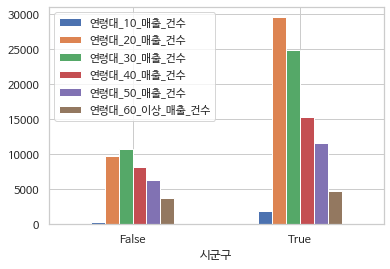

In [ ]:
hd.groupby([(hd['시군구']==0)])[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].mean().plot(kind="bar", rot=0)

- 강남구 연령대별 매출 건수

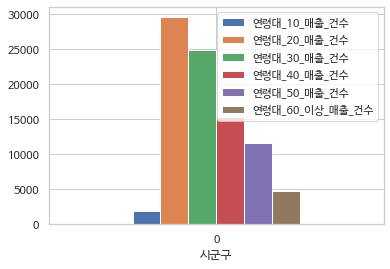

In [ ]:
gangnam.groupby('시군구')[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].mean().plot(kind="bar", rot=0)

- 강남구 시간대별 매출 비율

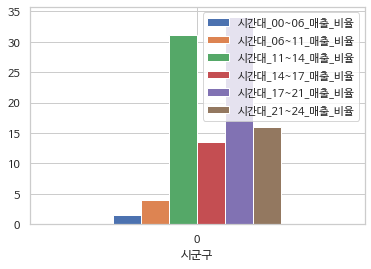

In [ ]:
gangnam.groupby('시군구')[["시간대_00~06_매출_비율","시간대_06~11_매출_비율","시간대_11~14_매출_비율","시간대_14~17_매출_비율","시간대_17~21_매출_비율","시간대_21~24_매출_비율"]].mean().plot(kind="bar", rot=0)

- 강남구 시간대별 매출 건수

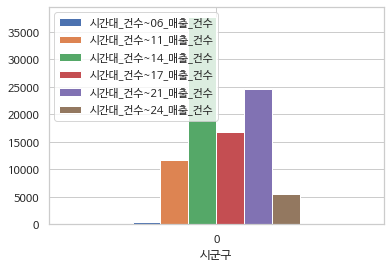

In [ ]:
gangnam.groupby('시군구')[['시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수','시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']].mean().plot(kind="bar", rot=0)

- 강남구 성별에 따른 매출 건수

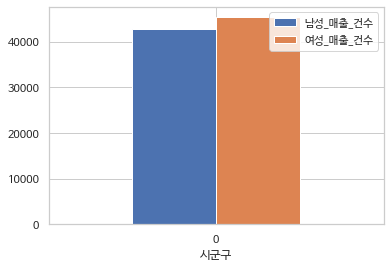

In [ ]:
gangnam.groupby('시군구')[['남성_매출_건수','여성_매출_건수']].mean().plot(kind="bar", rot=0)

- 마포구

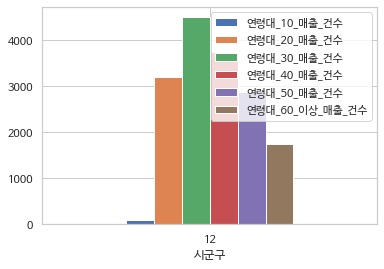

In [ ]:
mapo.groupby('시군구')[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].mean().plot(kind="bar", rot=0)

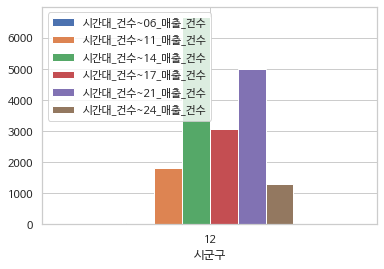

In [ ]:
mapo.groupby('시군구')[['시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수','시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']].mean().plot(kind="bar", rot=0)

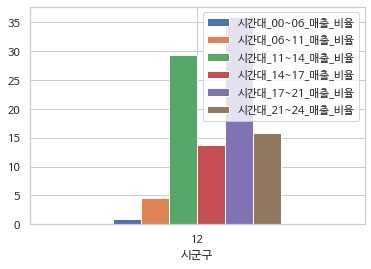

In [ ]:
mapo.groupby('시군구')[["시간대_00~06_매출_비율","시간대_06~11_매출_비율","시간대_11~14_매출_비율","시간대_14~17_매출_비율","시간대_17~21_매출_비율","시간대_21~24_매출_비율"]].mean().plot(kind="bar", rot=0)

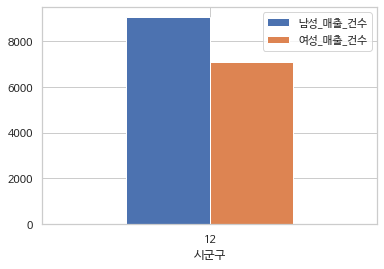

In [ ]:
mapo.groupby('시군구')[['남성_매출_건수','여성_매출_건수']].mean().plot(kind="bar", rot=0)

- 구로

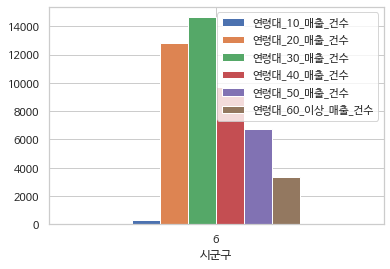

In [ ]:
guro.groupby('시군구')[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].mean().plot(kind="bar", rot=0)

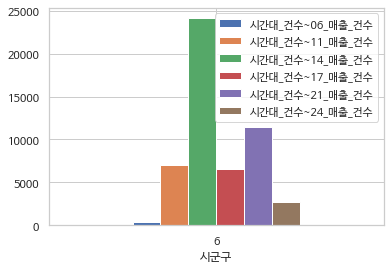

In [ ]:
guro.groupby('시군구')[['시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수','시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']].mean().plot(kind="bar", rot=0)

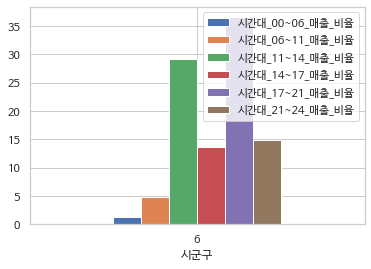

In [ ]:
guro.groupby('시군구')[["시간대_00~06_매출_비율","시간대_06~11_매출_비율","시간대_11~14_매출_비율","시간대_14~17_매출_비율","시간대_17~21_매출_비율","시간대_21~24_매출_비율"]].mean().plot(kind="bar", rot=0)

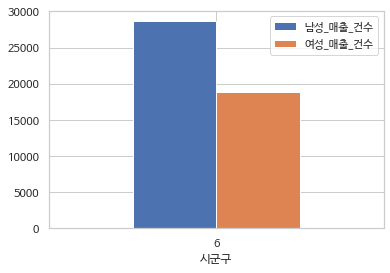

In [ ]:
guro.groupby('시군구')[['남성_매출_건수','여성_매출_건수']].mean().plot(kind="bar", rot=0)

- 성동구

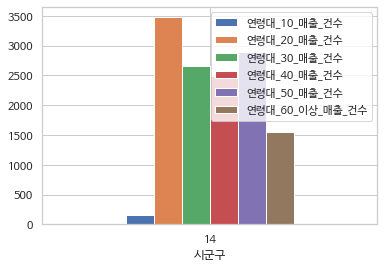

In [ ]:
sundong.groupby('시군구')[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].mean().plot(kind="bar", rot=0)

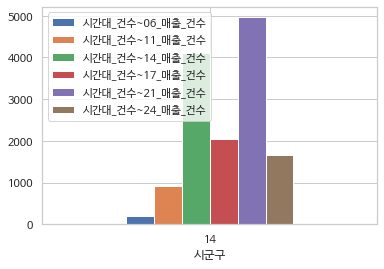

In [ ]:
sundong.groupby('시군구')[['시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수','시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']].mean().plot(kind="bar", rot=0)

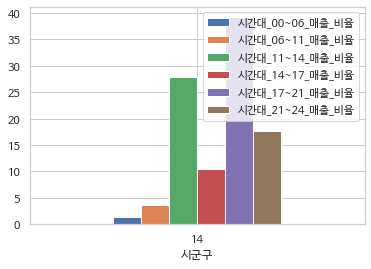

In [ ]:
sundong.groupby('시군구')[["시간대_00~06_매출_비율","시간대_06~11_매출_비율","시간대_11~14_매출_비율","시간대_14~17_매출_비율","시간대_17~21_매출_비율","시간대_21~24_매출_비율"]].mean().plot(kind="bar", rot=0)

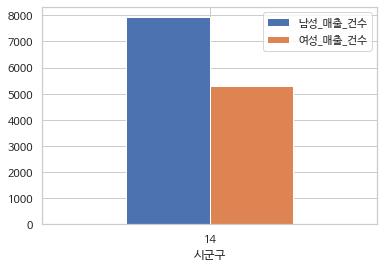

In [ ]:
sundong.groupby('시군구')[['남성_매출_건수','여성_매출_건수']].mean().plot(kind="bar", rot=0)

- 영등포

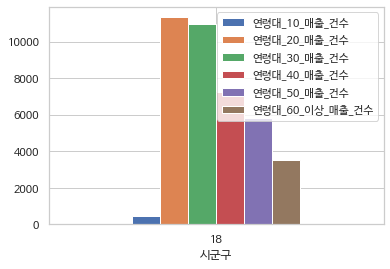

In [ ]:
ydp.groupby('시군구')[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].mean().plot(kind="bar", rot=0)

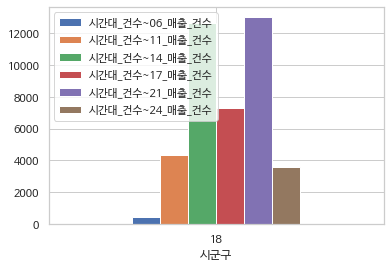

In [ ]:
ydp.groupby('시군구')[['시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수','시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']].mean().plot(kind="bar", rot=0)

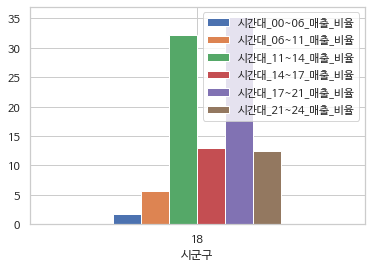

In [ ]:
ydp.groupby('시군구')[["시간대_00~06_매출_비율","시간대_06~11_매출_비율","시간대_11~14_매출_비율","시간대_14~17_매출_비율","시간대_17~21_매출_비율","시간대_21~24_매출_비율"]].mean().plot(kind="bar", rot=0)

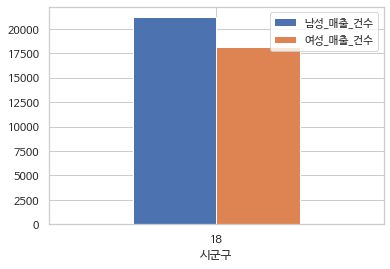

In [ ]:
ydp.groupby('시군구')[['남성_매출_건수','여성_매출_건수']].mean().plot(kind="bar", rot=0)